# 朴素贝叶斯法

作者：杨岱川

时间：2019年9月

github：https://github.com/DrDavidS/basic_Machine_Learning

开源协议：[MIT](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/LICENSE)

## 特征的相关性

统计学中，通常用相关系数描述两个变量之间的相关程度。

>[相关系数](https://baike.baidu.com/item/相关系数/3109424?fr=aladdin)是最早由统计学家[卡尔·皮尔逊](https://baike.baidu.com/item/卡尔·皮尔逊)设计的统计指标，是研究变量之间线性相关程度的量，一般用字母 $r$ 表示。由于研究对象的不同，相关系数有多种定义方式，较为常用的是皮尔逊相关系数。
>
>相关表和相关图可反映两个变量之间的相互关系及其相关方向，但无法确切地表明两个变量之间相关的程度。相关系数是用以反映变量之间相关关系密切程度的统计指标。相关系数是按积差方法计算，同样以两变量与各自平均值的离差为基础，通过两个离差相乘来反映两变量之间相关程度；着重研究线性的单相关系数。

----------

### Pearson

[Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)，中文叫“**皮尔逊相关系数**”，又称**皮尔逊积矩相关系数**（Pearson product-moment correlation coefficient），可以说是最常见的的衡量两个变量之间的线性相关性的方法。由英国数学家、生物统计学家卡尔·皮尔逊（Karl Pearson, 1857 - 1936）提出，他也被誉为现代统计科学的创立者。

<img src="https://gss3.bdstatic.com/-Po3dSag_xI4khGkpoWK1HF6hhy/baike/w%3D268%3Bg%3D0/sign=8b9b919232adcbef01347900949449e0/aec379310a55b319b0fd2a2340a98226cffc175b.jpg" width="300" alt="卡尔·皮尔逊" align=center>
<center>卡尔·皮尔逊</center>

>在说明 Pearson 相关系数之前，先回顾一下**协方差**（Covariance）的概念：
>
>期望值分别为 $E[X]$ 和 $E[Y]$ 的两个实随机变量 $X$ 和 $Y$之间的协方差 $cov(X,Y)$ 定义为：
>
>$$\large \operatorname{cov}(X,Y) = E \left[ (X-E[X])(Y-E[Y]) \right] $$
>
>协方差表示的是两个变量的总体的误差，这与只表示一个变量误差的方差不同。 如果两个变量的变化趋势一致，也就是说如果其中一个大于自身的期望值，另外一个也大于自身的期望值，那么两个变量之间的协方差就是正值。 如果两个变量的变化趋势相反，即其中一个大于自身的期望值，另外一个却小于自身的期望值，那么两个变量之间的协方差就是负值。
>
>如果 $X$ 与 $Y$ 是统计独立的，那么二者之间的协方差就是0，因为两个独立的随机变量满足 $E[XY]=E[X]E[Y]$。

Pearson相关系数公式如下：

$$\large \rho_{X,Y}=\frac{\operatorname{cov}(X,Y)}{\sigma_X\sigma_Y} $$

其中：

- $\operatorname {cov}$  是协方差；
- $\sigma_X$ 是 $X$ 的标准差；
- $\sigma_Y$ 是 $Y$ 的标准差。

代入协方差公式，则 $\rho_{X,Y}$ 可以改写为：

$$ \large \rho_{X,Y} = \frac{E \left[ (X-\mu_X)(Y-\mu_Y) \right]}{\sigma_X\sigma_Y}$$

其中：

- $\sigma_X$ 和 $\sigma_Y$ 已经在上文定义；
- $\mu _X$ 是 $X$ 的均值，即上文的期望；
- $\mu _Y$ 是 $Y$ 的均值，即上文的期望（期望和均值的关系就不展开讲了，具体可以参见[期望和平均数有什么区别？](https://www.zhihu.com/question/25391960/answer/333050835)）；
- $E$ 就是期望（expectation）。

由于：

- $\mu _X = E[X]$；
- $\mu _Y = E[Y]$；
- $\sigma^2 _X = E \left[ (X-E[X])^2 \right]=E[X^2]- \left[ E[X] \right]^2$，即 $X$ 的方差；
- $\sigma^2 _Y = E \left[ (Y-E[Y])^2 \right]=E[Y^2]- \left[ E[Y] \right]^2$，即 $Y$ 的方差；
- $E \left[ (X-\mu_X)(Y-\mu_Y) \right] = E\left[ (X-E[X])(Y-E[Y]) \right] = E[XY] - E[X]E[Y]$

故上式可以改写为：

$$ \large \rho_{X,Y} = \frac{E[XY] - E[X]E[Y]}{\sqrt{E[X^2]- \left[ E[X] \right]^2}\sqrt{E[Y^2]- \left[ E[Y] \right]^2}}$$

### 样本数据集中的Pearson相关性系数

给定数据集中有两列特征：

$$\large \left \{(x_1,y_1),(x_2,y_2),\cdots,(x_n,y_n) \right \} $$

则这些样本的两列特征的 Pearson 相关系数 $r_{xt}$，可以通过计算他们的方差和协方差得到：

$$\large r_{xy} = \frac 
{\sum^n_{i=1} (x_i- \bar x)(y_i- \bar y)}
{
\sqrt {\sum^n_{i=1} (x_i- \bar x)^2}
\sqrt {\sum^n_{i=1} (y_i- \bar y)^2}
} $$

其中：

- $i = 1,2,3,\cdots,n$，表示样本（编号）数量；
- $x_i,y_i$ 分别为单个实例中两个特征的值，$i$ 是索引；
- $\large \bar x = \frac{1}{n}\sum^n_{i=1}x_i $，表示样本的均值；$\large \bar y$同理。

到这里我们就得到了如何求解两列特征之间 Pearson 相关性系数的公式。上述公式还有其他表示，这里就不再推导了，可以参见[Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)中第1.2节。

### Pearson相关性系数的适用范围

Pearson相关系数的值在 $+1$ 和 $-1$ 之间，其中 $+1$ 表示总正线性相关性，$0$ 表示非线性相关性，$-1$ 表示总负线性相关性。

----------

### Spearman相关系数

[Spearman's rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) 以英国心理学家[查尔斯·斯皮尔曼](https://en.wikipedia.org/wiki/Charles_Spearman)（Charles Edward Spearman，1863 - 1945）命名，也叫斯皮尔曼等级相关系数，常用希腊字母 $\rho$ 或者 $r_s$表示。它评估了使用单调函数描述两个变量之间关系的程度。

Spearman 相关系数适用于**连续**和**离散序数**变量。Spearman相关系数的公式与计算Pearson相关性系数类似，但是用等级取代了各自的取值。

对于大小为 $n$ 的样本，其 $n$ 个原始值 $X_i,Y_i$ 可以转换为等级（ranks）相关数据 $\operatorname{rg}X_i, \operatorname{rg}Y_i$，其中 $ r_s $由下式计算得出：

$$
\large r_s 
= \rho_{rg_X,rg_Y} 
= \frac
{\operatorname{cov}(\operatorname{rg}_X,\operatorname{rg}_Y)}
{\sigma_{\operatorname {rg}_X}\sigma_{\operatorname{rg}_Y}} 
$$

其中：

- $\rho$ 表示等级变量（rank variables，有的也叫秩变量）的 Pearson 相关系数；
- $\operatorname{cov}(\operatorname{rg}_X,\operatorname{rg}_Y)$ 是等级变量的协方差；
- $\sigma_{\operatorname {rg}_X}$ 和 $\sigma_{\operatorname{rg}_Y}$ 是秩变量的标准偏差。

------------

### 其他

在统计学中还有很多其他类型的相关性系数，这里就不详细介绍了，简单提一部分：

- [组内相关系数（Intraclass correlation）](https://en.wikipedia.org/wiki/Intraclass_correlation)：用于描述同一组中的单元（units）彼此之间的相似程度。

- [Kendall相关系数（Kendall rank correlation coefficient）](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient)：表示多列等级变量相关程度的一种方法。

扩展阅读：[相关性系数](https://en.wikipedia.org/wiki/Correlation_coefficient)

## 特征相关性的代码实现

接下来我们来看看怎么实现上述常用的特征相关性方法。

### 数据准备

导入相关包和数据。老样子，还是使用 iris 数据集。有兴趣的同学可以更换为自己需要用的数据集试试。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

iris = pd.read_csv("Iris.csv")

筛选 iris 数据集的特征

In [2]:
iris_X = iris.iloc[:,1:5]  # 所有行，第2到第4列，注意索引从0开始
iris_X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Pearson相关性系数的实现

Dataframe 对象自带相关性计算方法，使用方法是：
```Python
DataFrame.corr(self, method='pearson', min_periods=1)
```
其中，参数还支持

- pearson 
- kendall 
- spearman 

在本例中，采用 Pearson系数 计算相关性如下：

In [3]:
iris_X.corr(method='pearson')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


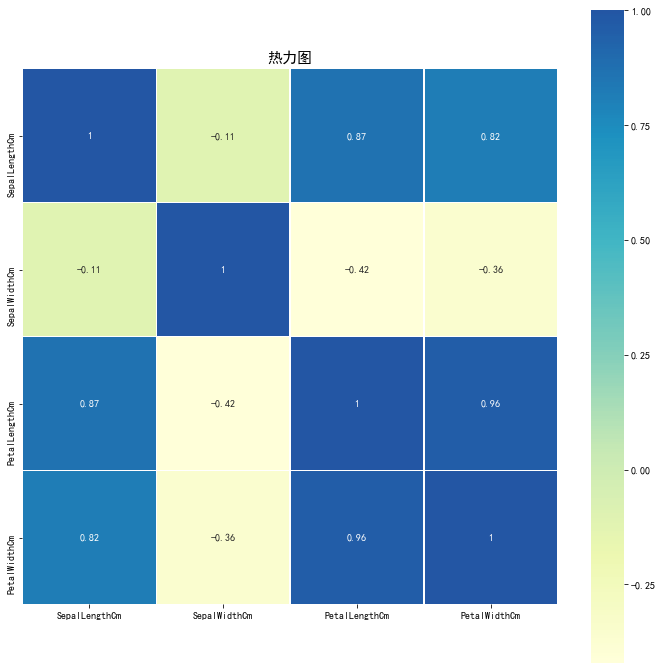

In [4]:
# 画布大小
plt.figure(figsize=(12,12))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('热力图', size=15)

# 绘制热力图
sns.heatmap(iris_X.corr(method='pearson'),  # 数据，dataframe
            linewidths=0.1,  # 隔断线的宽度
            vmax=1.0,  # 锚定色彩映射的值
            center=0.5,  #  色彩映射的最终值
            square=True,  # 正方形
            cmap='YlGnBu',  # 预设色彩类型
            linecolor='white', # 隔断线的色彩
            annot=True)

### Spearman相关性系数的实现

同 Pearson 相关性系数的实现类似，首先计算特征矩阵的 Spearman 相关性系数：

In [5]:
iris_X.corr(method='spearman')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.159457,0.881386,0.834421
SepalWidthCm,-0.159457,1.000000,-0.303421,-0.277511
PetalLengthCm,0.881386,-0.303421,1.000000,0.936003
PetalWidthCm,0.834421,-0.277511,0.936003,1.000000


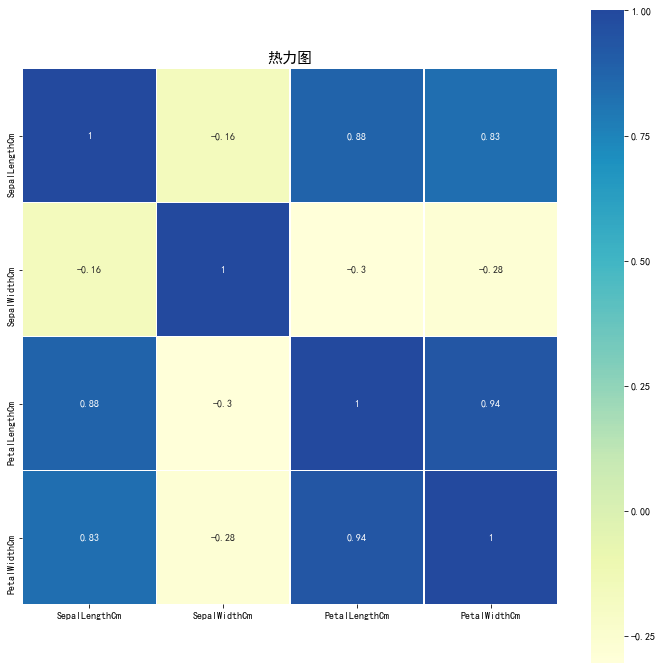

In [6]:
# 画布大小
plt.figure(figsize=(12,12))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('热力图', size=15)

# 绘制热力图
sns.heatmap(iris_X.corr(method='spearman'),  # 数据，dataframe
            linewidths=0.1,  # 隔断线的宽度
            vmax=1.0,  # 锚定色彩映射的值
            center=0.5,  #  色彩映射的最终值
            square=True,  # 正方形
            cmap='YlGnBu',  # 预设色彩类型
            linecolor='white', # 隔断线的色彩
            annot=True)

### 新增特征与相关性

我们在这里使用一种非常简单的特征工程，假设叶片的正面面积（不是表面积）近似等于叶片长度乘以叶片宽度，花萼面积也近似等于花萼长度乘以花萼宽度。

新增两列数据：花瓣面积 与 花萼面积

In [7]:
iris_X_with_Area = iris_X.copy()  # 注意 copy() 很重要！
iris_X_with_Area['SepalArea'] = iris_X.apply(lambda x: x[0]*x[1], axis=1)
iris_X_with_Area['PetalArea'] = iris_X.apply(lambda x: x[2]*x[3], axis=1)
iris_X_with_Area

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SepalArea,PetalArea
0,5.1,3.5,1.4,0.2,17.85,0.28
1,4.9,3.0,1.4,0.2,14.70,0.28
2,4.7,3.2,1.3,0.2,15.04,0.26
3,4.6,3.1,1.5,0.2,14.26,0.30
4,5.0,3.6,1.4,0.2,18.00,0.28
5,5.4,3.9,1.7,0.4,21.06,0.68
6,4.6,3.4,1.4,0.3,15.64,0.42
7,5.0,3.4,1.5,0.2,17.00,0.30
8,4.4,2.9,1.4,0.2,12.76,0.28
9,4.9,3.1,1.5,0.1,15.19,0.15


接下来我们一起看看，新增的两列会有与原始的四列数据的 Pearson 相关性系数会如何？

In [8]:
iris_X_with_Area.corr(method='pearson')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SepalArea,PetalArea
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.683362,0.857326
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,0.645421,-0.280612
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.366584,0.958472
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.375365,0.980229
SepalArea,0.683362,0.645421,0.366584,0.375365,1.000000,0.459484
PetalArea,0.857326,-0.280612,0.958472,0.980229,0.459484,1.000000


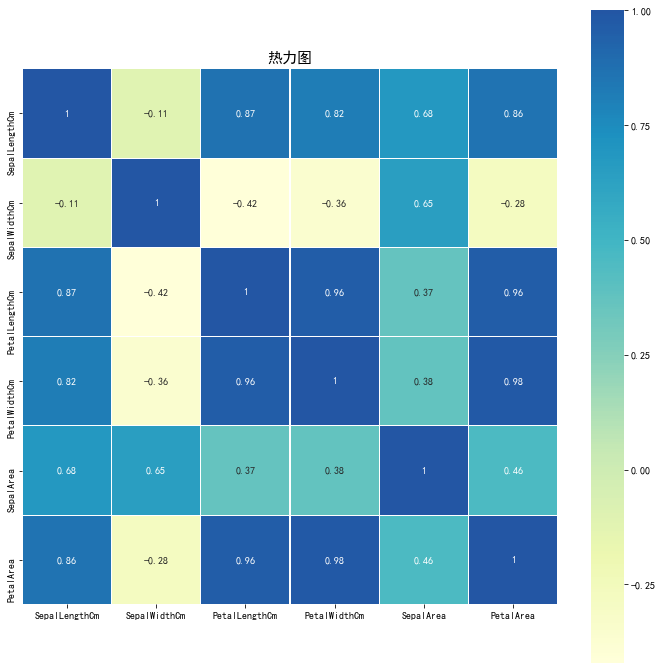

In [9]:
# 画布大小
plt.figure(figsize=(12,12))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('热力图', size=15)

# 绘制热力图
sns.heatmap(iris_X_with_Area.corr(method='pearson'),  # 数据，dataframe
            linewidths=0.1,  # 隔断线的宽度
            vmax=1.0,  # 锚定色彩映射的值
            center=0.5,  #  色彩映射的最终值
            square=True,  # 正方形
            cmap='YlGnBu',  # 预设色彩类型
            linecolor='white', # 隔断线的色彩
            annot=True)

上述图片和计算展示了新增的花瓣和花萼面积特征的方法，以及这些新增特征的相关性判别。

**如果新增一列随机特征会，他们的相关性会是什么样？**

我们来做一下实验：

## 朴素贝叶斯法简介

### 朴素贝叶斯的基本方法

### 何谓“朴素”

### 极大似然估计

### 算法流程

### 贝叶斯估计

## 朴素贝叶斯的SKlearn实现